## Importing Required Libraries

In [1]:
import nltk
print(nltk.__version__)

3.8.1


In [2]:
import numpy as np 
import pandas as pd
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

## Websraping the data

In [3]:
pip install google-play-scraper pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
#import json
#import pandas as pd
#from google_play_scraper import reviews, Sort


#app_package_name = 'com.okcupid.okcupid'


#result, continuation_token = reviews(
    #app_package_name,
    #lang='en',  
    #country='us', 
    #sort=Sort.NEWEST, 
    #count=200000
#)


#df = pd.DataFrame(result)

#df.to_excel('reviews_okcupid.xlsx', index=False)

#print("Reviews saved")

## Reading the Excel Files

In [5]:
df_fitbit = pd.read_excel("reviews_fitbit.xlsx")
df_fitbit.shape

(300000, 11)

In [6]:
df_headspace = pd.read_excel("reviews_headspace.xlsx")
df_headspace.shape

(64859, 11)

In [7]:
df_myfitnesspal = pd.read_excel("reviews_myfitnesspal.xlsx")
df_myfitnesspal.shape

(400000, 11)

In [8]:
df_fitbit.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3ef9e27a-48c6-434b-b55e-eaa287311d15,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I can't see my specific exercises in the app a...,1,94,4.21.fitbit-mobile-110084519-650249352,2024-07-25 17:01:49,"Hi, Bill. We're sorry to hear this. We appreci...",2024-07-24 18:46:21,4.21.fitbit-mobile-110084519-650249352
1,739a9f93-9f80-4069-af98-facc490bf69a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Terrible software, getting worse with every up...",1,0,4.21.fitbit-mobile-110084519-650249352,2024-07-25 16:49:27,NaN,NaT,4.21.fitbit-mobile-110084519-650249352
2,ca234460-2a3d-4d56-9539-ca375f138d66,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Beyond frustrated. 2nd day in a row that I fin...,1,0,4.21.fitbit-mobile-110084519-650249352,2024-07-25 16:30:56,"Hi, Jennifer. We're sorry to hear that. Please...",2024-07-25 16:40:38,4.21.fitbit-mobile-110084519-650249352
3,bacfbb5a-dee5-42ae-9d1c-042305e08ce8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Horrible since it changed. Cancelled my subscr...,1,0,4.21.fitbit-mobile-110084519-650249352,2024-07-25 14:49:00,NaN,NaT,4.21.fitbit-mobile-110084519-650249352
4,1421f1d0-7416-4703-b6da-eaf5cc09614c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,why is it not linked to MyFitnessPal any more?...,1,0,4.21.fitbit-mobile-110084519-650249352,2024-07-25 13:47:31,"Hi, Mona. Sorry about this. We recently releas...",2024-07-25 14:02:26,4.21.fitbit-mobile-110084519-650249352


In [9]:
df_headspace.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,21ab1037-4693-497f-b16c-503b29a50240,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I used to love using this app for it's Sleep C...,3,0,4.212.0,2024-07-25 15:44:10,NaN,NaT,4.212.0
1,11d67f97-fcd7-43cb-a193-9d179f916fba,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I don't like this app, like what the point of ...",1,0,4.213.0,2024-07-25 03:09:26,We’re sorry for any trouble accessing our free...,2024-07-25 03:18:23,4.213.0
2,d4452c50-77f2-499b-b7aa-784a9a906c20,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,adjustable times for meditations to meet your ...,5,0,4.212.0,2024-07-25 03:06:43,NaN,NaT,4.212.0
3,901c005a-29a1-4713-bc65-e606a7e0d69b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"As with most apps, they have gotten far too gr...",1,0,4.212.0,2024-07-24 20:03:07,Thank you for your review; we'll be sure your ...,2024-07-25 03:19:41,4.212.0
4,988690dc-ab53-4a7d-8c1e-96d451c6717e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Used to have many useful free meditations, mos...",1,0,4.212.0,2024-07-24 18:43:40,We’re sorry for any trouble accessing our free...,2024-07-25 03:19:53,4.212.0


In [10]:
df_myfitnesspal.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,27de1ae3-fc18-4861-bc47-1a0e8185b49f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I thought this was great!,5,0,NaN,2024-07-25 15:37:41,"Hi Rachel, thank you so much for your 5-star r...",2024-07-25 21:14:18,NaN
1,0dc00c26-434c-4967-8aef-dc5c6b40845f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good at watching what you eat but you have to ...,5,0,24.28.0,2024-07-25 15:08:37,We do apologize for the confusion. The standar...,2024-07-25 21:14:05,24.28.0
2,d2a1e1ea-93cc-4243-9228-e5e6b76aad7f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Phenomenal help,5,0,24.26.0,2024-07-25 12:33:17,NaN,NaT,24.26.0
3,a92420a4-7bcf-4106-bff1-495b71fb1010,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Upset they took away the barcode scanner from ...,4,0,24.21.0,2024-07-25 10:02:57,We understand your frustration about the Barco...,2024-07-25 21:13:58,24.21.0
4,a64854bf-fb14-4210-91c1-e5cceaef83e7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,App is not working,1,0,24.28.0,2024-07-25 09:33:27,We are truly sorry for any issues you are havi...,2024-07-25 21:05:12,24.28.0


## Data Preprocessing

In [11]:
fitbit_reviews = df_fitbit.iloc[:,3:4]
fitbit_reviews

,content
0,I can't see my specific exercises in the app a...
1,"Terrible software, getting worse with every up..."
2,Beyond frustrated. 2nd day in a row that I fin...
3,Horrible since it changed. Cancelled my subscr...
4,why is it not linked to MyFitnessPal any more?...
...,...
299995,"After a day and a half ( early I know), I am r..."
299996,I really love my fitbit app it lets me know wh...
299997,I love it
299998,3rd fitbit


In [12]:
headspace_reviews = df_headspace.iloc[:,3:4]
headspace_reviews

,content
0,I used to love using this app for it's Sleep C...
1,"I don't like this app, like what the point of ..."
2,adjustable times for meditations to meet your ...
3,"As with most apps, they have gotten far too gr..."
4,"Used to have many useful free meditations, mos..."
...,...
64854,Needs fixing; doesn't work.
64855,Does not run on Galaxy S II
64856,"Crashes, have uninstalled. Hope the developers..."
64857,"As other comment, crash on galaxy s2. No good"


In [13]:
myfitnesspal_reviews = df_myfitnesspal.iloc[:,3:4]
myfitnesspal_reviews

,content
0,I thought this was great!
1,Good at watching what you eat but you have to ...
2,Phenomenal help
3,Upset they took away the barcode scanner from ...
4,App is not working
...,...
399995,This app has a fairly wide database of foods a...
399996,Can use with my fit bit helps me know how much...
399997,Its really help me to ensure im not eat too mu...
399998,"Great, just a little slow, but that might just..."


In [14]:
df_reviews = pd.concat([fitbit_reviews,headspace_reviews,myfitnesspal_reviews],ignore_index=True)
df_reviews.shape

(764859, 1)

In [15]:
df_reviews.head()

,content
0,I can't see my specific exercises in the app a...
1,"Terrible software, getting worse with every up..."
2,Beyond frustrated. 2nd day in a row that I fin...
3,Horrible since it changed. Cancelled my subscr...
4,why is it not linked to MyFitnessPal any more?...


In [16]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764859 entries, 0 to 764858
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  764692 non-null  object
dtypes: object(1)
memory usage: 5.8+ MB


In [17]:
type(df_reviews.content[1])

str

In [18]:
L1 = []
for review in df_reviews.content:
    if isinstance(review, str):  # Check if the element is a string
        L1.append(review)
L1

["I can't see my specific exercises in the app anymore. If I run, swim, walk, etc the app no longer list that exercise. All it says is moderate or intense exercise. Some of the exercises were auto recognized and some I specifically started. I don't see that info for old exercises where I've seen it before. I rebooted my phone logged off and on the app. I will install that version when it gets loaded to the play store. Only the earlier version is currently available.",
 "Terrible software, getting worse with every update. FB used to do everything well, but of course Google made them an offer that was too good. For them. Now the software is clunky and less-featured, the website has been removed, support is a horrible joke, and if your device's battery lasts for more than a couple of days instead of the 5-6 it did last year, then I guess you have a defective (working) device. And where the hell is the payment system? Make us update, but break payments? ID-10T",
 "Beyond frustrated. 2nd da

In [19]:
len(L1)

764692

### Filtering out the reviews which have word count more than 20

In [20]:
L2 = []
for i in L1:
    if len(i.split())>20:
        L2.append(i)
L2

["I can't see my specific exercises in the app anymore. If I run, swim, walk, etc the app no longer list that exercise. All it says is moderate or intense exercise. Some of the exercises were auto recognized and some I specifically started. I don't see that info for old exercises where I've seen it before. I rebooted my phone logged off and on the app. I will install that version when it gets loaded to the play store. Only the earlier version is currently available.",
 "Terrible software, getting worse with every update. FB used to do everything well, but of course Google made them an offer that was too good. For them. Now the software is clunky and less-featured, the website has been removed, support is a horrible joke, and if your device's battery lasts for more than a couple of days instead of the 5-6 it did last year, then I guess you have a defective (working) device. And where the hell is the payment system? Make us update, but break payments? ID-10T",
 "Beyond frustrated. 2nd da

In [21]:
len(L2)

275283

In [22]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [23]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Set seed for reproducibility
DetectorFactory.seed = 0

def is_english(doc):
    try:
        return detect(doc) == 'en'
    except LangDetectException:
        return False

# Filter out non-English documents
filtered_corpus = [doc for doc in L2 if is_english(doc)]

len(filtered_corpus)

274748

In [24]:
non_english_docs = len(L2)-len(filtered_corpus)
non_english_docs

535

In [25]:
L2 

["I can't see my specific exercises in the app anymore. If I run, swim, walk, etc the app no longer list that exercise. All it says is moderate or intense exercise. Some of the exercises were auto recognized and some I specifically started. I don't see that info for old exercises where I've seen it before. I rebooted my phone logged off and on the app. I will install that version when it gets loaded to the play store. Only the earlier version is currently available.",
 "Terrible software, getting worse with every update. FB used to do everything well, but of course Google made them an offer that was too good. For them. Now the software is clunky and less-featured, the website has been removed, support is a horrible joke, and if your device's battery lasts for more than a couple of days instead of the 5-6 it did last year, then I guess you have a defective (working) device. And where the hell is the payment system? Make us update, but break payments? ID-10T",
 "Beyond frustrated. 2nd da

In [26]:
df = pd.DataFrame(filtered_corpus, columns=['Reviews'])
df

,Reviews
0,I can't see my specific exercises in the app a...
1,"Terrible software, getting worse with every up..."
2,Beyond frustrated. 2nd day in a row that I fin...
3,Now the app is useless and runs you in a circl...
4,Loved fitbit until now. Stopped tracking my di...
...,...
274743,love my fitness pal. It makes me aware of what...
274744,Love this app wont use anything else really go...
274745,More moderation of user-submitted foods would ...
274746,This app has a fairly wide database of foods a...


In [27]:
df.columns

Index(['Reviews'], dtype='object')

In [28]:
# making it to lower case
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower()for x in str(x).split()))
df['Reviews']

0         i can't see my specific exercises in the app a...
1         terrible software, getting worse with every up...
2         beyond frustrated. 2nd day in a row that i fin...
3         now the app is useless and runs you in a circl...
4         loved fitbit until now. stopped tracking my di...
                                ...                        
274743    love my fitness pal. it makes me aware of what...
274744    love this app wont use anything else really go...
274745    more moderation of user-submitted foods would ...
274746    this app has a fairly wide database of foods a...
274747    can use with my fit bit helps me know how much...
Name: Reviews, Length: 274748, dtype: object

In [29]:
#Removing Punctuation
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')
df['Reviews']

/var/folders/xg/l0pzd1q11n35y5zh_2zxvz1r0000gn/T/ipykernel_15096/4163835838.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')


0         i cant see my specific exercises in the app an...
1         terrible software getting worse with every upd...
2         beyond frustrated 2nd day in a row that i fini...
3         now the app is useless and runs you in a circl...
4         loved fitbit until now stopped tracking my dis...
                                ...                        
274743    love my fitness pal it makes me aware of what ...
274744    love this app wont use anything else really go...
274745    more moderation of usersubmitted foods would b...
274746    this app has a fairly wide database of foods a...
274747    can use with my fit bit helps me know how much...
Name: Reviews, Length: 274748, dtype: object

In [30]:
#remove stop words

from nltk.corpus import stopwords

stop = stopwords.words('english')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df['Reviews']

0         cant see specific exercises app anymore run sw...
1         terrible software getting worse every update f...
2         beyond frustrated 2nd day row finish workout 6...
3         app useless runs circle letting log think ill ...
4         loved fitbit stopped tracking distance reset e...
                                ...                        
274743    love fitness pal makes aware eat encourages re...
274744    love app wont use anything else really good ne...
274745    moderation usersubmitted foods would good easy...
274746    app fairly wide database foods best track kilo...
274747    use fit bit helps know much eat track im briliant
Name: Reviews, Length: 274748, dtype: object

In [31]:
# Lemmatization

from textblob import Word

df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Reviews']

0         cant see specific exercise app anymore run swi...
1         terrible software getting worse every update f...
2         beyond frustrated 2nd day row finish workout 6...
3         app useless run circle letting log think ill g...
4         loved fitbit stopped tracking distance reset e...
                                ...                        
274743    love fitness pal make aware eat encourages rec...
274744    love app wont use anything else really good ne...
274745    moderation usersubmitted food would good easy ...
274746    app fairly wide database food best track kiloj...
274747     use fit bit help know much eat track im briliant
Name: Reviews, Length: 274748, dtype: object

In [32]:
#creating a list named txt
txt=[]

#storing all reviews in txt list
txt=df['Reviews'].tolist()
txt

['cant see specific exercise app anymore run swim walk etc app longer list exercise say moderate intense exercise exercise auto recognized specifically started dont see info old exercise ive seen rebooted phone logged app install version get loaded play store earlier version currently available',
 'terrible software getting worse every update fb used everything well course google made offer good software clunky lessfeatured website removed support horrible joke device battery last couple day instead 56 last year guess defective working device hell payment system make u update break payment id10t',
 'beyond frustrated 2nd day row finish workout 6700 step app hold number refreshes drop 1500 took screen shot today whats point want see step visual person also isnt way edit step account mess app fix app want step show thats whole point fitbit annoyed frustrated bothered yesterday today infuriating',
 'app useless run circle letting log think ill guess add thing garbage belongs lock provide 

In [33]:
#final cleaning using regular expression re
import re

processed_features = []

for sentence in range(0, len(txt)):
    

    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(txt[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    
    #Remove all number characters 
    processed_feature  = re.sub(r"\d", "", processed_feature)
 
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    #removing spaces from end and front
    processed_feature = re.sub(r"^\s+", "",processed_feature)
    
    # Converting to Lowercase
    processed_feature = processed_feature.lower()
     
    #storing the processed feature in processed_features list in each time a loop runs    
    processed_features.append(processed_feature)

In [34]:
#getting the last entity of list for sanity check
processed_features[-1]

'use fit bit help know much eat track im briliant'

In [35]:
#length of processed features is same as the number of reviews posted in original data
len(processed_features)

274748

In [36]:
processed_features

['cant see specific exercise app anymore run swim walk etc app longer list exercise say moderate intense exercise exercise auto recognized specifically started dont see info old exercise ive seen rebooted phone logged app install version get loaded play store earlier version currently available',
 'terrible software getting worse every update fb used everything well course google made offer good software clunky lessfeatured website removed support horrible joke device battery last couple day instead last year guess defective working device hell payment system make update break payment idt',
 'beyond frustrated nd day row finish workout step app hold number refreshes drop took screen shot today whats point want see step visual person also isnt way edit step account mess app fix app want step show thats whole point fitbit annoyed frustrated bothered yesterday today infuriating',
 'app useless run circle letting log think ill guess add thing garbage belongs lock provide exactly zero answe

In [37]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import nltk

In [38]:
processed_docs = [word_tokenize(doc) for doc in processed_features]

In [39]:
type(processed_docs)

list

In [40]:
dictionary = corpora.Dictionary(processed_docs)

In [41]:
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

## Coherence score plotting for number of topics (2 - 20)

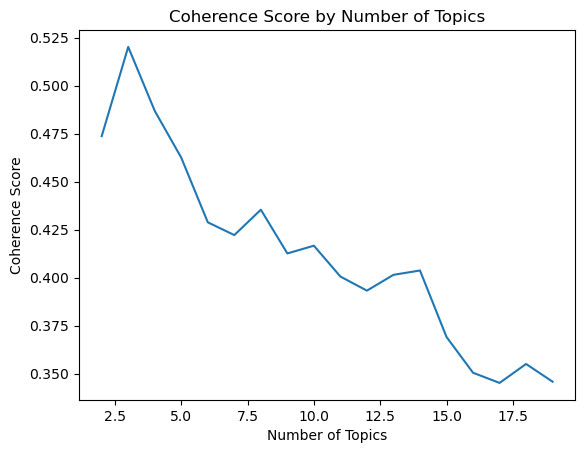

Num Topics = 2, Coherence Score = 0.4737
Num Topics = 3, Coherence Score = 0.5202
Num Topics = 4, Coherence Score = 0.4869
Num Topics = 5, Coherence Score = 0.4624
Num Topics = 6, Coherence Score = 0.4288
Num Topics = 7, Coherence Score = 0.4221
Num Topics = 8, Coherence Score = 0.4354
Num Topics = 9, Coherence Score = 0.4126
Num Topics = 10, Coherence Score = 0.4166
Num Topics = 11, Coherence Score = 0.4005
Num Topics = 12, Coherence Score = 0.3932
Num Topics = 13, Coherence Score = 0.4014
Num Topics = 14, Coherence Score = 0.4037
Num Topics = 15, Coherence Score = 0.3691
Num Topics = 16, Coherence Score = 0.3504
Num Topics = 17, Coherence Score = 0.3451
Num Topics = 18, Coherence Score = 0.3550
Num Topics = 19, Coherence Score = 0.3457


In [42]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=42,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Compute coherence values for different numbers of topics
start, limit, step = 2, 20, 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus, processed_docs, start, limit, step)

# Plot coherence scores 
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics")
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print(f"Num Topics = {m}, Coherence Score = {cv:.4f}")

In [43]:
# Identify the number of topics with the highest coherence score
max_coherence_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[max_coherence_index]
optimal_num_topics = x[max_coherence_index]

print(f"\nOptimal Number of Topics: {optimal_num_topics}")
print("\nTopics:")

# Extract and print the topics from the optimal model
topics = optimal_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


Optimal Number of Topics: 3

Topics:
(0, '0.029*"app" + 0.027*"time" + 0.022*"work" + 0.019*"update" + 0.015*"cant" + 0.014*"fitbit" + 0.012*"doesnt" + 0.011*"still" + 0.011*"phone" + 0.011*"since"')
(1, '0.081*"app" + 0.028*"use" + 0.022*"like" + 0.019*"would" + 0.019*"really" + 0.018*"make" + 0.014*"im" + 0.014*"using" + 0.013*"great" + 0.013*"much"')
(2, '0.054*"food" + 0.047*"calorie" + 0.033*"love" + 0.031*"track" + 0.025*"weight" + 0.024*"keep" + 0.021*"easy" + 0.019*"help" + 0.017*"eat" + 0.017*"exercise"')


##### We can infer that consumers are talking only on 3 topics in 70k reviews, from consumer behavior angle this inferences can't be justified hence number of topics chosen would be 11

In [44]:
# Identify the number of topics with the highest coherence score
optimal_coherence_index = 11
optimal_model = model_list[optimal_coherence_index]
optimal_num_topics = x[optimal_coherence_index]

print(f"\nOptimal Number of Topics: {optimal_num_topics}")
print("\nTopics:")

# Extract and print the topics from the optimal model
topics = optimal_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


Optimal Number of Topics: 13

Topics:
(0, '0.216*"calorie" + 0.091*"day" + 0.049*"goal" + 0.040*"well" + 0.035*"helped" + 0.026*"pound" + 0.020*"keeping" + 0.020*"fat" + 0.017*"little" + 0.016*"show"')
(1, '0.098*"star" + 0.070*"without" + 0.066*"user" + 0.057*"etc" + 0.056*"youre" + 0.045*"losing" + 0.032*"friendly" + 0.027*"available" + 0.021*"improvement" + 0.018*"within"')
(2, '0.152*"count" + 0.106*"entry" + 0.095*"pal" + 0.063*"havent" + 0.060*"sugar" + 0.048*"absolutely" + 0.041*"wrong" + 0.029*"fine" + 0.023*"kept" + 0.023*"suggestion"')
(3, '0.200*"recipe" + 0.095*"easier" + 0.093*"nutritional" + 0.089*"macro" + 0.052*"especially" + 0.045*"result" + 0.038*"create" + 0.037*"ingredient" + 0.033*"website" + 0.027*"interface"')
(4, '0.250*"eat" + 0.057*"info" + 0.050*"workout" + 0.047*"sometimes" + 0.042*"useful" + 0.033*"habit" + 0.027*"number" + 0.026*"thats" + 0.026*"training" + 0.025*"strength"')
(5, '0.135*"counting" + 0.107*"almost" + 0.097*"bit" + 0.090*"fit" + 0.082*"peop

## Topics Labelling

Identified topics are lebelled manually

1. **Calorie Tracking and Goal Setting**  
   (0, '0.216*"calorie" + 0.091*"day" + 0.049*"goal" + 0.040*"well" + 0.035*"helped" + 0.026*"pound" + 0.020*"keeping" + 0.020*"fat" + 0.017*"little" + 0.016*"show"')

2. **User Experience and App Feedback**  
   (1, '0.098*"star" + 0.070*"without" + 0.066*"user" + 0.057*"etc" + 0.056*"youre" + 0.045*"losing" + 0.032*"friendly" + 0.027*"available" + 0.021*"improvement" + 0.018*"within"')

3. **Food Logging and Pal Entry Issues**  
   (2, '0.152*"count" + 0.106*"entry" + 0.095*"pal" + 0.063*"havent" + 0.060*"sugar" + 0.048*"absolutely" + 0.041*"wrong" + 0.029*"fine" + 0.023*"kept" + 0.023*"suggestion"')

4. **Recipes and Nutritional Information**  
   (3, '0.200*"recipe" + 0.095*"easier" + 0.093*"nutritional" + 0.089*"macro" + 0.052*"especially" + 0.045*"result" + 0.038*"create" + 0.037*"ingredient" + 0.033*"website" + 0.027*"interface"')

5. **Eating Habits and Workouts**  
   (4, '0.250*"eat" + 0.057*"info" + 0.050*"workout" + 0.047*"sometimes" + 0.042*"useful" + 0.033*"habit" + 0.027*"number" + 0.026*"thats" + 0.026*"training" + 0.025*"strength"')

6. **Fitness and Motivation**  
   (5, '0.135*"counting" + 0.107*"almost" + 0.097*"bit" + 0.090*"fit" + 0.082*"people" + 0.078*"huge" + 0.043*"eye" + 0.043*"figure" + 0.032*"soon" + 0.031*"place"')

7. **General App Usage**  
   (6, '0.125*"app" + 0.048*"love" + 0.040*"track" + 0.038*"great" + 0.037*"use" + 0.032*"weight" + 0.031*"keep" + 0.024*"help" + 0.021*"exercise" + 0.020*"using"')

8. **User Onboarding and Initial Impressions**  
   (7, '0.088*"started" + 0.063*"enough" + 0.061*"screen" + 0.061*"life" + 0.041*"convenient" + 0.040*"thought" + 0.040*"store" + 0.039*"fast" + 0.035*"quite" + 0.033*"home"')

9. **App Performance and Updates**  
   (8, '0.056*"ive" + 0.050*"work" + 0.047*"time" + 0.033*"update" + 0.031*"even" + 0.031*"week" + 0.027*"every" + 0.026*"cant" + 0.025*"fitbit" + 0.021*"doesnt"')

10. **User Satisfaction and Improvements**  
    (9, '0.089*"like" + 0.075*"really" + 0.072*"make" + 0.051*"much" + 0.045*"way" + 0.042*"one" + 0.036*"see" + 0.033*"better" + 0.026*"lot" + 0.023*"go"')

11. **Weight Loss and Social Features**  
    (10, '0.154*"lose" + 0.150*"wish" + 0.139*"able" + 0.070*"friend" + 0.055*"nice" + 0.051*"choice" + 0.037*"perfect" + 0.025*"bug" + 0.024*"crash" + 0.023*"slow"')

12. **Food Database and Logging**  
    (11, '0.144*"food" + 0.069*"easy" + 0.054*"would" + 0.035*"eating" + 0.034*"meal" + 0.031*"add" + 0.030*"intake" + 0.026*"database" + 0.025*"log" + 0.025*"barcode"')

13. **App Functionality and User Feedback**  
    (12, '0.055*"right" + 0.048*"instead" + 0.047*"definitely" + 0.045*"thanks" + 0.045*"come" + 0.038*"yet" + 0.037*"thank" + 0.033*"ago" + 0.033*"record" + 0.033*"function"')

In [47]:
Reviews_2000 = pd.read_excel("Reviews_2000_Probabilities.xlsx")
Reviews_2000.head()

,score,content,Unnamed: 2,App
0,1,July 2024 app update (S24) results in my Charg...,NaN,Fitbit
1,1,Really disappointed with the latest update the...,NaN,Fitbit
2,1,"It's ok, since Google took over many functions...",NaN,Fitbit
3,1,"Does not give much information, also misses wo...",NaN,Fitbit
4,1,I have a problem. The time refused to adjust t...,NaN,Fitbit


In [48]:
reviews = list(Reviews_2000["content"])
reviews

["July 2024 app update (S24) results in my Charge 5 watch battery dying within just 2 hours!!! So mad at Fitbit. This is a known issue. DON'T INSTALL THE UPDATES!",
 "Really disappointed with the latest update the sleep review is so rubbish. I think that as lots of people have said I'll just buy a different brand of tracker. My watch has lost the ability to show me the time so as the sleep data changing to the current useless graph makes me want to change It's not so much the information of the latest update it's the layout of the sleep profile - it's been updated to a really basic format that isn't as easy to understand as the previous dark graph",
 'It\'s ok, since Google took over many functions don\'t work right. Updated: This gets worse with every "upgrade". You get less and less data and pay more.',
 'Does not give much information, also misses workouts , sleep, naps, and heart rate. I paid for a subscription for this app and its JUNK.........and a fitbit device, it is also JUNK.

In [50]:
topic_distributions = []

# Iterate through each review
for review in reviews:
    # Preprocess the review (tokenization, removing stop words, etc.)
    review_bow = dictionary.doc2bow(review.lower().split())
    
    # Get the topic distribution for the review
    topic_distribution = optimal_model.get_document_topics(review_bow, minimum_probability=0)
    
    # Convert the distribution to a list of probabilities
    topic_probs = [prob for _, prob in topic_distribution]
    
    # Append the topic probabilities to the list
    topic_distributions.append(topic_probs)
    
    # Convert the list of topic distributions into a DataFrame
topic_df = pd.DataFrame(topic_distributions, columns=[f'Topic_{i}' for i in range(13)])

# Display the DataFrame
print(topic_df.head())

# Optionally, save the DataFrame to a CSV file
topic_df.to_csv('topic_probabilities.csv', index=False)

    Topic_0   Topic_1   Topic_2   Topic_3   Topic_4   Topic_5   Topic_6  \
0  0.075177  0.071949  0.013428  0.016768  0.024755  0.010757  0.324130   
1  0.090955  0.013140  0.008512  0.010630  0.015693  0.037260  0.292232   
2  0.075154  0.020722  0.013424  0.016763  0.024748  0.010754  0.374546   
3  0.055327  0.040388  0.009883  0.012341  0.030776  0.007917  0.402120   
4  0.086187  0.035372  0.012569  0.015696  0.023172  0.010069  0.287676   

    Topic_7   Topic_8   Topic_9  Topic_10  Topic_11  Topic_12  
0  0.064099  0.138163  0.091449  0.020784  0.129742  0.018798  
1  0.029730  0.130885  0.198695  0.013175  0.114715  0.044378  
2  0.012893  0.173250  0.108478  0.020777  0.129701  0.018792  
3  0.059667  0.139390  0.105010  0.015296  0.095484  0.026403  
4  0.027971  0.193269  0.101583  0.035439  0.153400  0.017596  


## Topic occurrence frequency analysis

In [54]:
import pandas as pd

# List to store the most probable topic for each document
doc_topic_assignment = []

# Iterate through each document in the corpus
for doc in corpus:
    # Get the topic distribution for the current document
    topic_probabilities = optimal_model.get_document_topics(doc)
    
    # Find the topic with the maximum probability
    max_topic = max(topic_probabilities, key=lambda x: x[1])[0]
    
    # Assign the document to this topic
    doc_topic_assignment.append(max_topic)

# Count the occurrences of each topic in the document assignments
topic_counts = Counter(doc_topic_assignment)

# Calculate the total number of documents
total_documents = len(corpus)

# Create a list to store the frequency percentages for each topic
topic_frequency = []

for topic in range(optimal_num_topics):
    count = topic_counts[topic] if topic in topic_counts else 0
    percentage = (count / total_documents) * 100
    topic_frequency.append((topic, percentage))

# Convert to a DataFrame for better presentation
df = pd.DataFrame(topic_frequency, columns=['Topic', 'Frequency (%)'])

# Display the table
print(df)

    Topic  Frequency (%)
0       0       0.001456
1       1       0.000000
2       2       0.000000
3       3       0.000000
4       4       0.000000
5       5       0.000000
6       6      97.698982
7       7       0.000364
8       8       2.223856
9       9       0.034577
10     10       0.000000
11     11       0.040765
12     12       0.000000


## Regression analysis

In [78]:
Reg = pd.read_excel("Reviews_2000_Probabilities.xlsx")
Reg.head()

,score,Reviews,App,Calorie Tracking and Goal Setting,User Experience and App Feedback,Food Logging and Pal Entry Issues,Recipes and Nutritional Information,Eating Habits and Workouts,Fitness and Motivation,General App Usage,User Onboarding and Initial Impressions,App Performance and Updates,User Satisfaction and Improvements,Weight Loss and Social Features,Food Database and Logging,App Functionality and User Feedback
0,1,I was hoping to find a free app that could hel...,Headspace,0.053317,0.026814,0.009524,0.011892,0.017557,0.007629,0.459448,0.033324,0.110773,0.113299,0.014740,0.104126,0.037556
1,1,Not nearly as good as it used to be. You can't...,My Fitness Pal,0.062375,0.017199,0.011142,0.013913,0.020540,0.008926,0.439191,0.024872,0.100457,0.146727,0.017245,0.121818,0.015597
2,1,It was good while it worked. Not only can I no...,Fitbit,0.071492,0.019713,0.012770,0.015946,0.023542,0.010230,0.422185,0.012266,0.147629,0.086967,0.019765,0.139619,0.017876
3,1,On 7th september i have paid for an annual sub...,Headspace,0.056814,0.041138,0.010148,0.012672,0.018709,0.008130,0.412711,0.074091,0.129922,0.094887,0.015707,0.098051,0.027019
4,1,Starting using this app 3/30. Learned about th...,My Fitness Pal,0.072672,0.020038,0.012981,0.016209,0.023931,0.010399,0.412654,0.012468,0.150056,0.104912,0.020091,0.125419,0.018171


In [79]:
Reg.columns

Index(['score', 'Reviews', 'App', 'Calorie Tracking and Goal Setting',
       'User Experience and App Feedback', 'Food Logging and Pal Entry Issues',
       'Recipes and Nutritional Information', 'Eating Habits and Workouts',
       'Fitness and Motivation', 'General App Usage',
       'User Onboarding and Initial Impressions',
       'App Performance and Updates', 'User Satisfaction and Improvements',
       'Weight Loss and Social Features', 'Food Database and Logging',
       'App Functionality and User Feedback'],
      dtype='object')

In [80]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'Reg' is your DataFrame and 'score' is the target variable

# Define the independent variables (features) and the target variable
X = Reg.drop(columns=['score','Reviews','App'])

# Add a constant to the model (intercept)
X = sm.add_constant(X)

y = Reg['score']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     41.92
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           6.21e-95
Time:                        00:18:40   Log-Likelihood:                -3290.8
No. Observations:                2001   AIC:                             6610.
Df Residuals:                    1987   BIC:                             6688.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [81]:
# Define the independent variables (features) and the target variable
X_1 = Reg.drop(columns=['score','Reviews','App','User Experience and App Feedback','Food Logging and Pal Entry Issues',
       'Recipes and Nutritional Information', 'Eating Habits and Workouts',
       'Fitness and Motivation','Weight Loss and Social Features','App Functionality and User Feedback'], axis=1)

# Add a constant to the model (intercept)
X_1 = sm.add_constant(X_1)

y_1 = Reg['score']

# Fit the regression model
model1 = sm.OLS(y_1, X_1).fit()

# Print the summary of the regression
print(model1.summary())

# Calculate VIF for each feature
vif_data_1 = pd.DataFrame()
vif_data_1["Feature"] = X_1.columns
vif_data_1["VIF"] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]

# Display the VIF
print("\nVariance Inflation Factor (VIF):")
print(vif_data_1)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     85.59
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.27e-95
Time:                        00:18:40   Log-Likelihood:                -3304.0
No. Observations:                2001   AIC:                             6622.
Df Residuals:                    1994   BIC:                             6661.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

## Dominance Analysis

In [76]:
from dominance_analysis import Dominance

Loading BokehJS ...

In [83]:
import pandas as pd
from dominance_analysis import Dominance

# Assuming you've already defined X_1 and y_1
# X_1 is your feature set, and y_1 is your target variable

# Combine X_1 and y_1 back into a DataFrame for dominance analysis
Reg_subset = pd.concat([X_1, y_1], axis=1)

# Initialize the dominance analysis
dominance = Dominance(data=Reg_subset, target='score', top_k=None)

# Perform dominance analysis
dominance.incremental_rsquare()

# Get the dominance analysis results
dominance_results = dominance.dominance_stats()

# Print the dominance analysis summary
print("\nDominance Analysis Summary:")
print(dominance_results)

Selecting 7 Best Predictors for the Model
Selected Predictors :  ['const', 'Calorie Tracking and Goal Setting', 'General App Usage', 'User Onboarding and Initial Impressions', 'App Performance and Updates', 'User Satisfaction and Improvements', 'Food Database and Logging']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.20479026585798343

Selecting 7 Best Predictors for the Model
Selected Predictors :  ['const', 'Calorie Tracking and Goal Setting', 'General App Usage', 'User Onboarding and Initial Impressions', 'App Performance and Updates', 'User Satisfaction and Improvements', 'Food Database and Logging']

Creating models for 127 possible combinations of 7 features :


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 26.62it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1098.51it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################


Dominance Analysis Summary:
                                        Interactional Dominance  \
App Performance and Updates                            0.038303   
General App Usage                                       0.00074   
Calorie Tracking and Goal Setting                      0.007975   
Food Database and Logging                              0.001077   
User Onboarding and Initial Impressions                0.006557   
User Satisfaction and Improvements                     0.001367   
const                                                       0.0   

                                        Individual Dominance  \
App Performance and Updates                         0.168374   
General App Usage                                   0.060973   
Calorie Tracking and Goal Setting                   0.039879   
Food Database and Logging                           0.045709   
User Onboarding an

## Correspondence Analysis

In [85]:
Reg.head()

,score,Reviews,App,Calorie Tracking and Goal Setting,User Experience and App Feedback,Food Logging and Pal Entry Issues,Recipes and Nutritional Information,Eating Habits and Workouts,Fitness and Motivation,General App Usage,User Onboarding and Initial Impressions,App Performance and Updates,User Satisfaction and Improvements,Weight Loss and Social Features,Food Database and Logging,App Functionality and User Feedback
0,1,I was hoping to find a free app that could hel...,Headspace,0.053317,0.026814,0.009524,0.011892,0.017557,0.007629,0.459448,0.033324,0.110773,0.113299,0.014740,0.104126,0.037556
1,1,Not nearly as good as it used to be. You can't...,My Fitness Pal,0.062375,0.017199,0.011142,0.013913,0.020540,0.008926,0.439191,0.024872,0.100457,0.146727,0.017245,0.121818,0.015597
2,1,It was good while it worked. Not only can I no...,Fitbit,0.071492,0.019713,0.012770,0.015946,0.023542,0.010230,0.422185,0.012266,0.147629,0.086967,0.019765,0.139619,0.017876
3,1,On 7th september i have paid for an annual sub...,Headspace,0.056814,0.041138,0.010148,0.012672,0.018709,0.008130,0.412711,0.074091,0.129922,0.094887,0.015707,0.098051,0.027019
4,1,Starting using this app 3/30. Learned about th...,My Fitness Pal,0.072672,0.020038,0.012981,0.016209,0.023931,0.010399,0.412654,0.012468,0.150056,0.104912,0.020091,0.125419,0.018171


In [96]:
Reg.isnull().sum()

score                                      0
Reviews                                    0
App                                        0
Calorie Tracking and Goal Setting          0
User Experience and App Feedback           0
Food Logging and Pal Entry Issues          0
Recipes and Nutritional Information        0
Eating Habits and Workouts                 0
Fitness and Motivation                     0
General App Usage                          0
User Onboarding and Initial Impressions    0
App Performance and Updates                0
User Satisfaction and Improvements         0
Weight Loss and Social Features            0
Food Database and Logging                  0
App Functionality and User Feedback        0
dtype: int64

In [98]:
Reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   score                                    2001 non-null   int64  
 1   Reviews                                  2001 non-null   object 
 2   App                                      2001 non-null   object 
 3   Calorie Tracking and Goal Setting        2001 non-null   float64
 4   User Experience and App Feedback         2001 non-null   float64
 5   Food Logging and Pal Entry Issues        2001 non-null   float64
 6   Recipes and Nutritional Information      2001 non-null   float64
 7   Eating Habits and Workouts               2001 non-null   float64
 8   Fitness and Motivation                   2001 non-null   float64
 9   General App Usage                        2001 non-null   float64
 10  User Onboarding and Initial Impressions  2001 no

In [102]:
import pandas as pd

# Create a DataFrame with the data from the image
data = {
    'Ratings': [1, 2, 3, 4, 5],
    'App Performance and Updates': [7, 4, 0, 0, 1],
    'Food Database and Logging': [0, 0, 0, 0, 1],
    'General App Usage': [394, 396, 400, 400, 398]
}

corr_df = pd.DataFrame(data)
corr_df

,Ratings,App Performance and Updates,Food Database and Logging,General App Usage
0,1,7,0,394
1,2,4,0,396
2,3,0,0,400
3,4,0,0,400
4,5,1,1,398


In [105]:
import prince

# Initialize the Correspondence Analysis model
ca = prince.CA(n_components=2, random_state=42)

# Fit the model to the data (excluding the 'Ratings' column)
ca = ca.fit(corr_df.set_index('Ratings'))

# Get the row and column coordinates
row_coordinates = ca.row_coordinates(corr_df.set_index('Ratings'))
column_coordinates = ca.column_coordinates(corr_df.set_index('Ratings'))

# Display the row and column coordinates
print("Row Coordinates:\n", row_coordinates)
print("\nColumn Coordinates:\n", column_coordinates)

Row Coordinates:
                 0         1
Ratings                    
1        0.150033  0.002808
2        0.054822 -0.013367
3       -0.072869 -0.035061
4       -0.072869 -0.035061
5       -0.059491  0.080674

Column Coordinates:
                                     0         1
App Performance and Updates  1.131474  0.091297
Food Database and Logging   -0.667545  1.885970
General App Usage           -0.006494 -0.001500


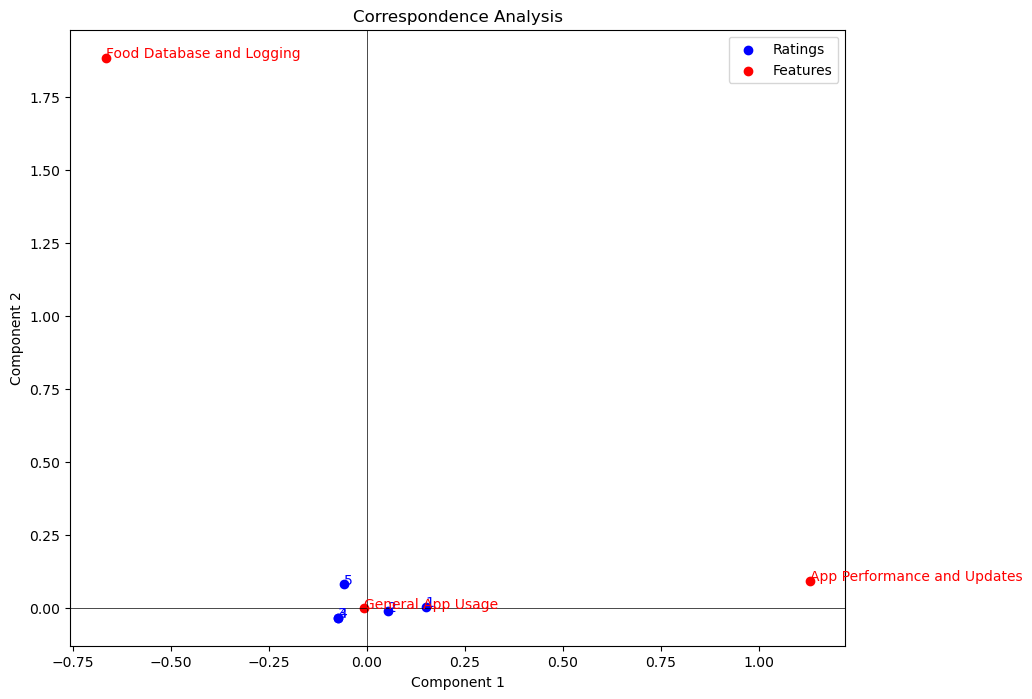

In [110]:
import matplotlib.pyplot as plt

# Plot the row coordinates
plt.figure(figsize=(10, 8))
plt.scatter(row_coordinates.iloc[:, 0], row_coordinates.iloc[:, 1], c='blue', label='Ratings')

# Annotate the rows
for i, txt in enumerate(row_coordinates.index):
    plt.annotate(txt, (row_coordinates.iloc[i, 0], row_coordinates.iloc[i, 1]), color='blue')

# Plot the column coordinates
plt.scatter(column_coordinates.iloc[:, 0], column_coordinates.iloc[:, 1], c='red', label='Features')

# Annotate the columns
for i, txt in enumerate(column_coordinates.index):
    plt.annotate(txt, (column_coordinates.iloc[i, 0], column_coordinates.iloc[i, 1]), color='red')

# Add labels and legend
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Correspondence Analysis')

# Remove all grid lines
plt.grid(False)

# Add grid lines only at the origin
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Add legend and show plot
plt.legend()
plt.show()


In [112]:
import pandas as pd
import numpy as np
import prince
from scipy.stats import chi2_contingency

# Assuming corr_df is your DataFrame
# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(corr_df.set_index('Ratings'))

# Print the statistical summary
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

# Perform Correspondence Analysis
ca = prince.CA(n_components=2, n_iter=10, random_state=42)
ca = ca.fit(corr_df.set_index('Ratings'))

# Extract eigenvalues and explained inertia
eigenvalues = ca.eigenvalues_
explained_inertia = (eigenvalues / eigenvalues.sum()) * 100  # Calculate explained inertia in percentage

# Extract row and column coordinates
row_coordinates = ca.row_coordinates(corr_df.set_index('Ratings'))
column_coordinates = ca.column_coordinates(corr_df.set_index('Ratings'))

# Display the statistical summary
print("\nEigenvalues:\n", eigenvalues)
print("\nExplained Inertia (Percentage):\n", explained_inertia)
print("\nRow Coordinates:\n", row_coordinates)
print("\nColumn Coordinates:\n", column_coordinates)

# Optional: Save the summary to a CSV file
summary_df = pd.DataFrame({
    'Eigenvalues': eigenvalues,
    'Explained Inertia (%)': explained_inertia
})

summary_df

Chi-Square Statistic: 19.5536
Degrees of Freedom: 8
P-Value: 0.0122

Eigenvalues:
 [0.00794215 0.00182977]

Explained Inertia (Percentage):
 [81.27519045 18.72480955]

Row Coordinates:
                 0         1
Ratings                    
1        0.150033  0.002808
2        0.054822 -0.013367
3       -0.072869 -0.035061
4       -0.072869 -0.035061
5       -0.059491  0.080674

Column Coordinates:
                                     0         1
App Performance and Updates  1.131474  0.091297
Food Database and Logging   -0.667545  1.885970
General App Usage           -0.006494 -0.001500


,Eigenvalues,Explained Inertia (%)
0,0.007942,81.27519
1,0.001830,18.72481
